<a href="https://colab.research.google.com/github/dilip1320/wound/blob/main/wound(trial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [18]:
!unzip -q /content/data.zip -d /content/custom_data

replace /content/custom_data/classes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-11-02 18:50:19--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-11-02 18:50:19 (57.8 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Number of image files: 149
Number of annotation files: 149
Images moving to train: 134
Images moving to validation: 15


In [ ]:
!pip install ultralytics

In [27]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }


  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 6
names:
- abrasions
- bruises
- burns
- cuts
- laceration
- stab wound


In [21]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

In [22]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/28 /content/data/validation/images/13044484-bruises_98.jpg: 640x640 1 bruises, 19.8ms
image 2/28 /content/data/validation/images/20378239-laseration_51.jpg: 640x640 1 bruises, 1 laceration, 15.7ms
image 3/28 /content/data/validation/images/2153085e-burns_40.jpg: 640x640 1 bruises, 15.6ms
image 4/28 /content/data/validation/images/278265d2-stab_wound_14.jpg: 640x640 4 stab wounds, 15.6ms
image 5/28 /content/data/validation/images/30f6d35f-stab_wound_3.jpg: 640x640 (no detections), 15.6ms
image 6/28 /content/data/validation/images/3fc046fc-burns_31.jpg: 640x640 1 laceration, 15.6ms
image 7/28 /content/data/validation/images/4d493190-stab_wound_16.jpg: 640x640 1 stab wound, 15.6ms
image 8/28 /content/data/validation/images/4f48f5c1-cut_28.jpg: 640x640 1 cuts, 15.6ms
image 9/28 /content/data/validation/images/508e6f0

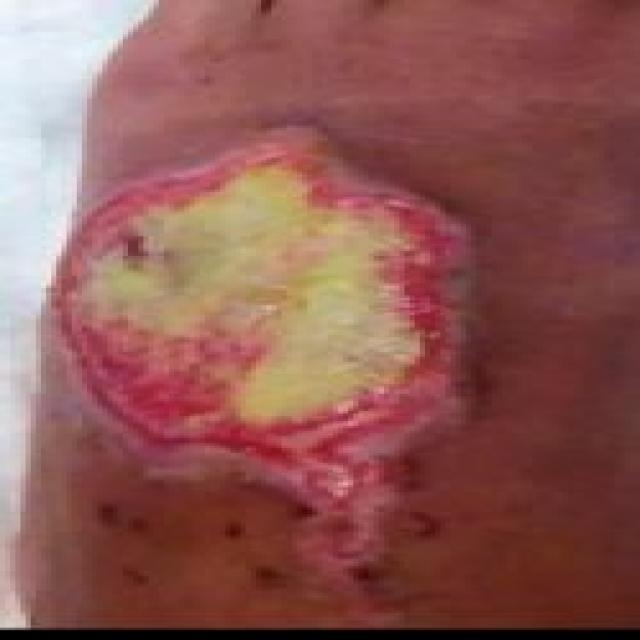

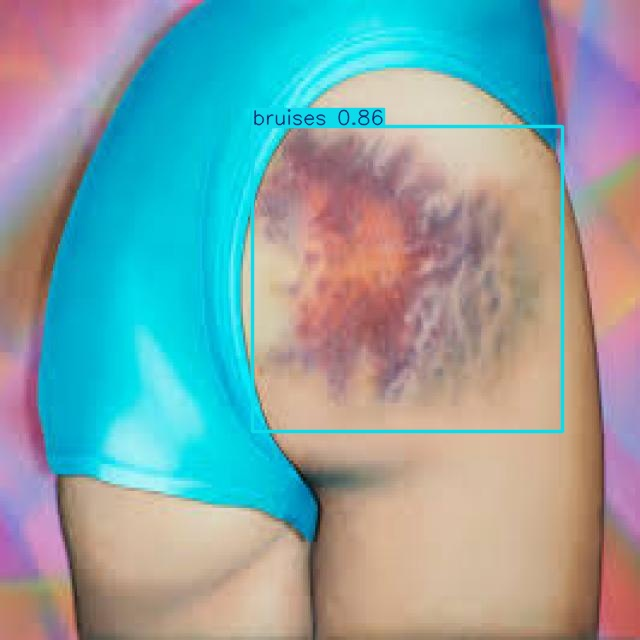

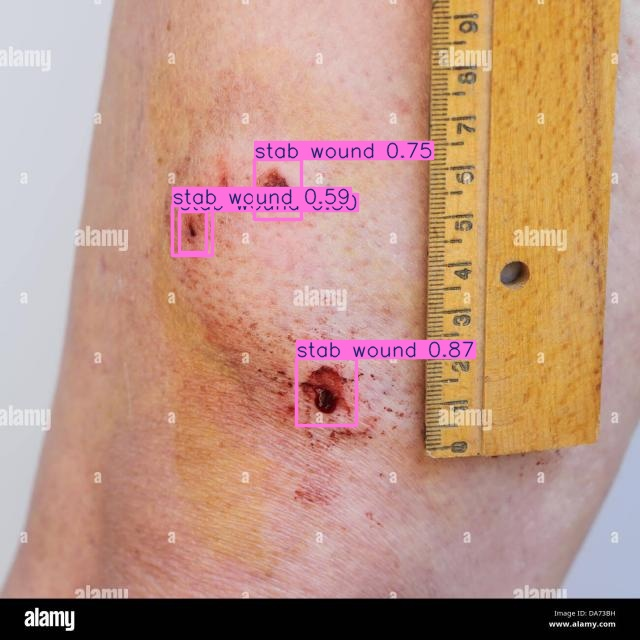

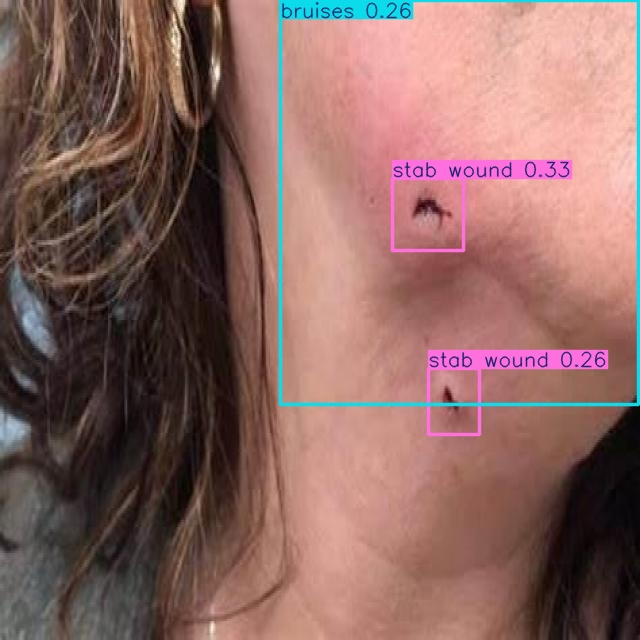

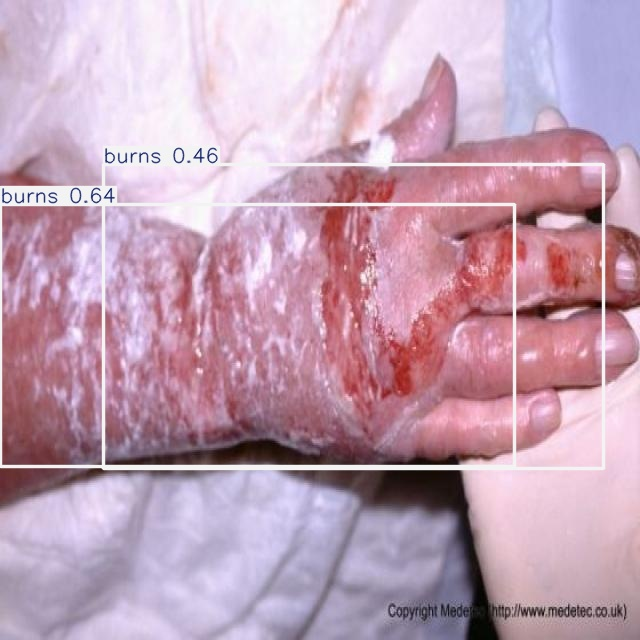

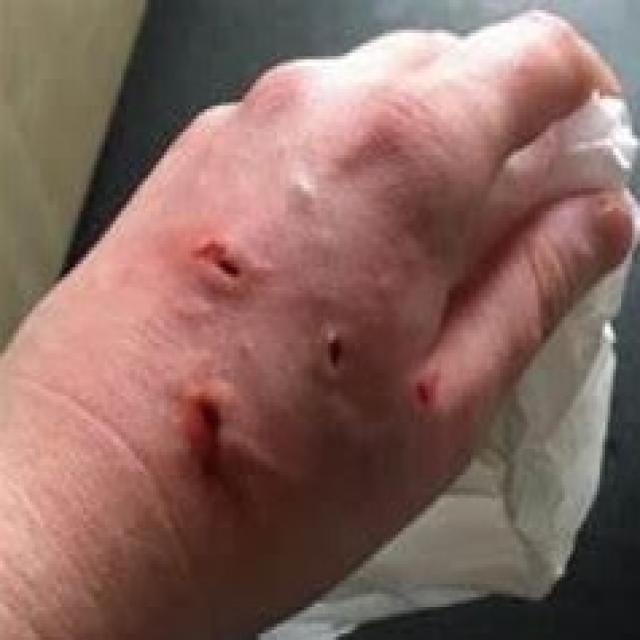

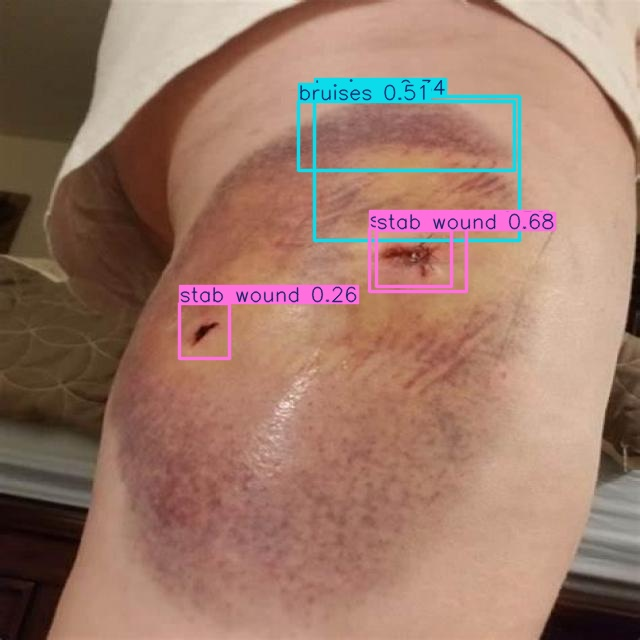

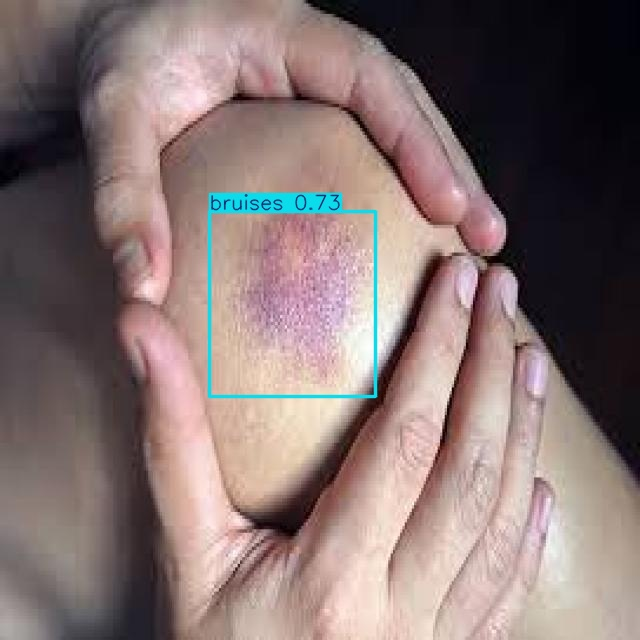

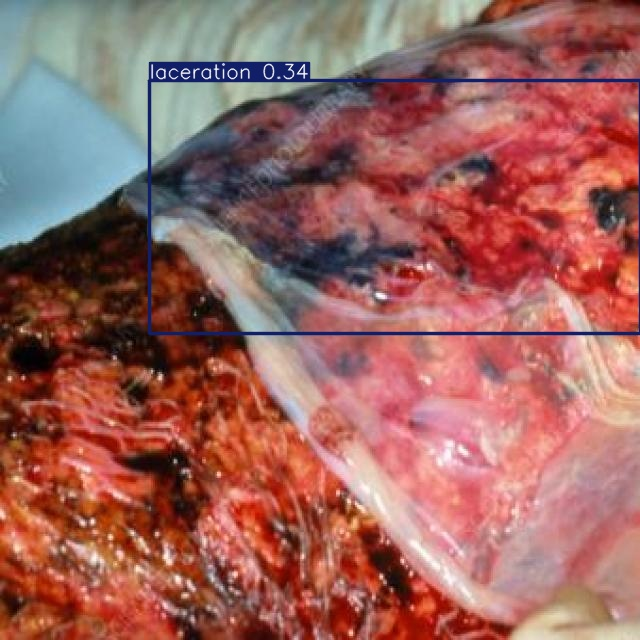

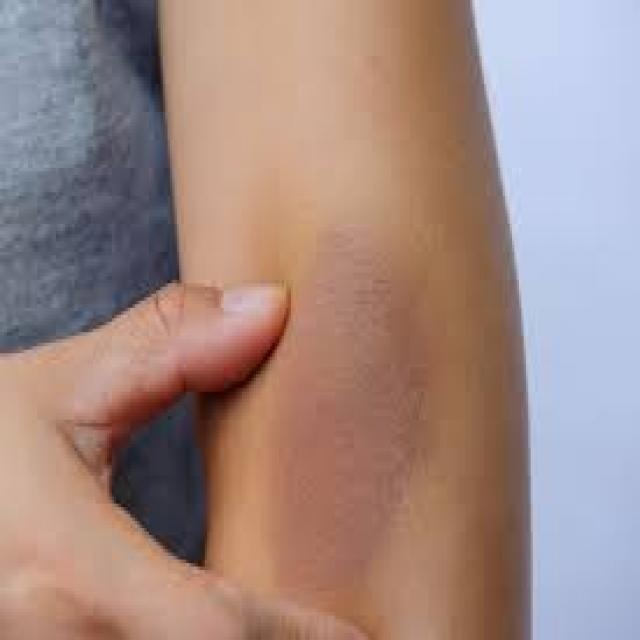

In [36]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [38]:
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
updating: my_model.pt (deflated 8%)
updating: train/ (stored 0%)
updating: train/train_batch452.jpg (deflated 8%)
updating: train/labels.jpg (deflated 30%)
updating: train/BoxP_curve.png (deflated 8%)
updating: train/results.png (deflated 6%)
updating: train/weights/ (stored 0%)
updating: train/weights/best.pt (deflated 8%)
updating: train/weights/last.pt (deflated 8%)
updating: train/confusion_matrix_normalized.png (deflated 24%)
updating: train/args.yaml (deflated 53%)
updating: train/train_batch1.jpg (deflated 3%)
updating: train/BoxF1_curve.png (deflated 10%)
updating: train/results.csv (deflated 59%)
updating: train/train_batch450.jpg (deflated 10%)
updating: train/val_batch0_pred.jpg (deflated 11%)
updating: train/confusion_matrix.png (deflated 28%)
updating: train/BoxR_curve.png (deflated 14%)
updating: train/train_batch2.jpg (deflated 3%)
updating: train/train_batch0.jpg (deflated 5%)
updating: train/train_batch451.jpg (deflated 6%)
updating: train/BoxPR_curve

In [25]:
!pip install ultralytics

In [29]:
from ultralytics import YOLO


HEALING_TIMES_DB = {
    "abrasions": {
        "range": "7-14 days",
        "note": "For a simple abrasion, assuming it is kept clean to prevent infection."
    },
    "bruises": {
        "range": "10-20 days",
        "note": "Varies based on severity. The bruise will change colors as it heals."
    },
    "burns": {
        "range": "14-30+ days",
        "note": "HIGHLY dependent on the burn degree (1st, 2nd, 3rd). This is a rough estimate for a moderate burn."
    },
    "cuts": {
        "range": "7-10 days",
        "note": "For a simple cut that doesn't require stitches. Deeper cuts will take longer."
    },
    "laceration": {
        "range": "14-28 days",
        "note": "Often requires medical attention (e.g., stitches) to heal properly."
    },
    "stab wound": {
        "range": "30-60+ days",
        "note": "CRITICAL: Requires immediate medical attention. Healing time is highly variable based on depth and organs affected."
    }
}



def predict_healing_time(model_path, image_path):
    """
    Detects wounds in an image using the trained YOLO model and
    provides an estimated healing time for each detected wound.
    """


    try:
        model = YOLO(model_path)
    except Exception as e:
        print(f"Error loading model from {model_path}.")
        print(f"Error details: {e}")
        return

    try:
        results = model(image_path)
    except Exception as e:
        print(f"Error running prediction on image: {image_path}.")
        print(f"Error details: {e}")
        return

    print(f"--- Analysis for {image_path} ---")


    if not results:
        print("No results found.")
        return

    detected_wounds = 0
    for result in results:
        boxes = result.boxes
        if not boxes:
            continue

        for box in boxes:
            detected_wounds += 1


            class_id = int(box.cls[0])
            class_name = model.names[class_id]


            confidence = float(box.conf[0])

            healing_info = HEALING_TIMES_DB.get(class_name)

            print(f"\nDetected Wound #{detected_wounds}: {class_name.upper()}")
            print(f"  - Confidence: {confidence:.2%}")

            if healing_info:
                print(f"  - Estimated Healing Range: {healing_info['range']}")
                print(f"  - Note: {healing_info['note']}")
            else:
                print(f"  - No healing time information found for '{class_name}'.")

    if detected_wounds == 0:
        print("No wounds were detected in the image.")

    print(f"-----------------------------------")

In [43]:

model_path = "/content/my_model/my_model.pt"

image_to_test = "/content/images (1).jpg"

print(f"Running prediction for: {image_to_test}\n")
predict_healing_time(model_path, image_to_test)

Running prediction for: /content/images (1).jpg


image 1/1 /content/images (1).jpg: 384x640 1 abrasions, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
--- Analysis for /content/images (1).jpg ---

Detected Wound #1: ABRASIONS
  - Confidence: 28.57%
  - Estimated Healing Range: 7-14 days
  - Note: For a simple abrasion, assuming it is kept clean to prevent infection.
-----------------------------------
